In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = []
june_temps = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date) == 6).all()

In [5]:
#  3. Convert the June temperatures to a list.
june_temps

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June
import pandas as pd

june_temps_df = pd.DataFrame(june_temps, columns =['date', 'tobs'])
june_temps_df.rename(columns = {'tobs' : 'June Temperatures'}, inplace = True)
june_temps_df

,date,June Temperatures
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temperatures
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = []
dec_temps = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date) == 12).all()

In [9]:
# 7. Convert the December temperatures to a list.
dec_temps

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns =['date', 'tobs'])
dec_temps_df.rename(columns = {'tobs' : 'December Temperatures'}, inplace = True)
dec_temps_df

,date,December Temperatures
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [12]:
#Querries for Summary

In [13]:
#FIRST SET OF QUERIES for Temperature

In [14]:
#OAHU Temperature Summary for June
Oahu_J_Temps = []

Oahu_J_Temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(extract('month', Measurement.date) == 6).all()
print(Oahu_J_Temps)

#WAIHEE Temperature Summary for June
Waihee_J_Temps = []

Waihee_J_Temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(extract('month', Measurement.date) == 6).\
filter(Measurement.station == 'USC00519281').all()
print(Waihee_J_Temps)

#WAIKIKI Temperature Summary for June
Waikiki_J_Temps = []

Waikiki_J_Temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(extract('month', Measurement.date) == 6).\
filter(Measurement.station == 'USC00519397').all()
print(Waikiki_J_Temps)

[(64.0, 85.0, 74.94411764705882)]
[(65.0, 82.0, 73.27118644067797)]
[(70.0, 84.0, 77.55932203389831)]


In [15]:
#OAHU Temperature Summary for December
Oahu_Dec_Temps = []

Oahu_Dec_Temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(extract('month', Measurement.date) == 12).all()
print(Oahu_J_Temps)

#WAIHEE Temperature Summary for December
Waihee_Dec_Temps = []

Waihee_Dec_Temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(extract('month', Measurement.date) == 12).\
filter(Measurement.station == 'USC00519281').all()
print(Waihee_J_Temps)

#WAIKIKI Temperature Summary for December
Waikiki_Dec_Temps = []

Waikiki_Dec_Temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(extract('month', Measurement.date) == 12).\
filter(Measurement.station == 'USC00519397').all()
print(Waikiki_J_Temps)

[(64.0, 85.0, 74.94411764705882)]
[(65.0, 82.0, 73.27118644067797)]
[(70.0, 84.0, 77.55932203389831)]


In [16]:
#SECOND SET OF QUERIES for Precipitation

In [17]:
#OAHU Precipitation Summary for June
Oahu_June_Prcp=[]

Oahu_June_Prcp = session.query(Measurement.prcp).\
filter(extract('month', Measurement.date) == 6)
Oahu_June_Prcp_df = pd.DataFrame(Oahu_June_Prcp, columns =['June_Prcp(Oahu)'])
print(Oahu_June_Prcp_df.describe())

#Waihee Precipitation Summary for June
Waihee_June_Prcp=[]

Waihee_June_Prcp = session.query(Measurement.prcp).\
filter(extract('month', Measurement.date) == 6).\
filter(Measurement.station == 'USC00519281').all()
Waihee_June_Prcp_df = pd.DataFrame(Waihee_June_Prcp, columns =['June_Prcp(Waihee)'])
print(Waihee_June_Prcp_df.describe())

#Waikiki Precipitation Summary for June
Waikiki_June_Prcp=[]

Waikiki_June_Prcp = session.query(Measurement.prcp).\
filter(extract('month', Measurement.date) == 6).\
filter(Measurement.station == 'USC00519397').all()
Waikiki_June_Prcp_df = pd.DataFrame(Waikiki_June_Prcp, columns =['June_Prcp(Waikiki)'])
Waikiki_June_Prcp_df.describe()
print(Waikiki_June_Prcp_df.describe())

       June_Prcp(Oahu)
count      1574.000000
mean          0.136360
std           0.335731
min           0.000000
25%           0.000000
50%           0.020000
75%           0.120000
max           4.430000
       June_Prcp(Waihee)
count         236.000000
mean            0.151525
std             0.213496
min             0.000000
25%             0.010000
50%             0.060000
75%             0.212500
max             1.390000
       June_Prcp(Waikiki)
count          233.000000
mean             0.022661
std              0.089427
min              0.000000
25%              0.000000
50%              0.000000
75%              0.010000
max              0.890000


<AxesSubplot:ylabel='Frequency'>

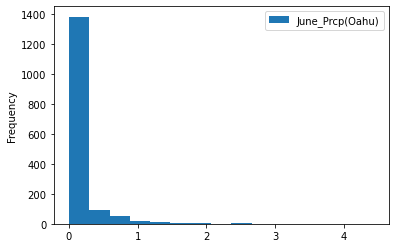

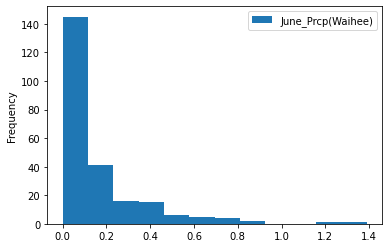

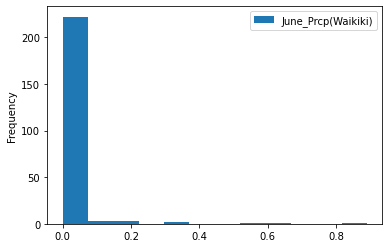

In [18]:
#creating a histogram for the Precipitation observations for June
Oahu_June_Prcp_df.plot.hist(bins=15)
Waihee_June_Prcp_df.plot.hist(bins=12)
Waikiki_June_Prcp_df.plot.hist(bins=12)

In [19]:
#OAHU Precipitation Summary for December
Oahu_Dec_Prcp=[]

Oahu_Dec_Prcp = session.query(Measurement.prcp).\
filter(extract('month', Measurement.date) == 12)
Oahu_Dec_Prcp_df = pd.DataFrame(Oahu_Dec_Prcp, columns =['Dec_Prcp(Oahu)'])
print(Oahu_Dec_Prcp_df.describe())

#Waihee Precipitation Summary for December
Waihee_Dec_Prcp=[]

Waihee_Dec_Prcp = session.query(Measurement.prcp).\
filter(extract('month', Measurement.date) == 12).\
filter(Measurement.station == 'USC00519281').all()
Waihee_Dec_Prcp_df = pd.DataFrame(Waihee_Dec_Prcp, columns =['Dec_Prcp(Waihee)'])
print(Waihee_Dec_Prcp_df.describe())

#Waikiki Precipitation Summary for December
Waikiki_Dec_Prcp=[]

Waikiki_Dec_Prcp = session.query(Measurement.prcp).\
filter(extract('month', Measurement.date) == 12).\
filter(Measurement.station == 'USC00519397').all()
Waikiki_Dec_Prcp_df = pd.DataFrame(Waikiki_Dec_Prcp, columns =['Dec_Prcp(Waikiki)'])
Waikiki_Dec_Prcp_df.describe()
print(Waikiki_Dec_Prcp_df.describe())

       Dec_Prcp(Oahu)
count     1405.000000
mean         0.216819
std          0.541399
min          0.000000
25%          0.000000
50%          0.030000
75%          0.150000
max          6.420000
       Dec_Prcp(Waihee)
count        217.000000
mean           0.244931
std            0.489789
min            0.000000
25%            0.010000
50%            0.070000
75%            0.230000
max            3.140000
       Dec_Prcp(Waikiki)
count         207.000000
mean            0.075314
std             0.242803
min             0.000000
25%             0.000000
50%             0.000000
75%             0.035000
max             2.010000


<AxesSubplot:ylabel='Frequency'>

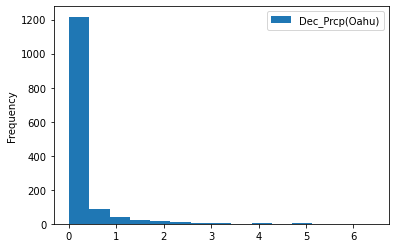

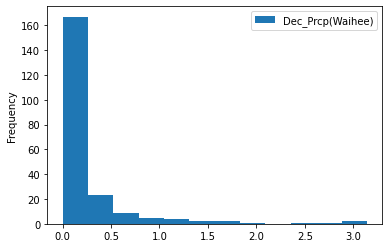

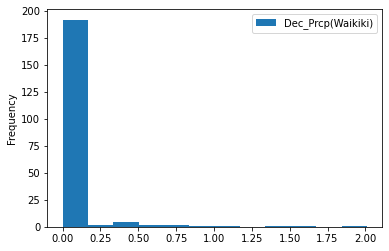

In [20]:
#creating a histogram for the Precipitation observations for December
Oahu_Dec_Prcp_df.plot.hist(bins=15)
Waihee_Dec_Prcp_df.plot.hist(bins=12)
Waikiki_Dec_Prcp_df.plot.hist(bins=12)